<a href="https://www.kaggle.com/code/antongalysh/pytorch-ipynb?scriptVersionId=248698589" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Тензор

Tensor - це багатовимірний масив даних в PyTorch. Він схожий на
Numpy array, але має ряд ключових відмінностей:

* **Підтримка GPU:** Тензори PyTorch можуть
    використовуватися на GPU
    для прискорення обчислень,
    що недоступно в Numpy.
* **Градієнти:** Тензори PyTorch
    підтримують градієнти,
    що робить їх зручними
    для використання в
    нейронних мережах.

# Створення тензорів

**З Numpy array**

In [2]:
import torch
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6]])
tensor_a = torch.from_numpy(a)

print(tensor_a, '\n')

print(f'{tensor_a.shape=}\n')

print(f'{tensor_a.size()=}')

tensor([[1, 2, 3],
        [4, 5, 6]]) 

tensor_a.shape=torch.Size([2, 3])

tensor_a.size()=torch.Size([2, 3])


**З списків:**

In [3]:
tensor_a.dtype

torch.int64

In [4]:
tensor_a.device

device(type='cpu')

In [ ]:
tensor_b = torch.tensor([[1, 2, 3], [4, 5, 6]])

tensor_b

**З функцій:**

In [5]:
tensor_c = torch.randn(3, 4)  # Випадкові числа
tensor_d = torch.zeros(3, 4)  # Нулі
tensor_e = torch.ones(3, 4)  # Одиниці

print(f'rand {tensor_c}\n')
print(f'zero {tensor_d}\n')
print(f'one {tensor_e}\n')

rand tensor([[-1.2549,  0.7203,  0.1813, -0.1747],
        [-0.0047,  0.1771, -0.7669, -1.3282],
        [ 0.4675,  0.7180, -1.8569,  1.4068]])

zero tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

one tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])



# Індексування тензорів

In [6]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f'{tensor=}\n')

# Отримати значення з тензора
value = tensor[0, 1]  # 2
print(f'{value=}\n')

# Отримати рядок
row = tensor[0]  # tensor([1, 2, 3])
print(f'{row=}\n')

# Отримати стовпець
column = tensor[:, 1]  # tensor([2, 5])
print(f'{column=}\n')

# Зміна значення
tensor[0, 1] = 10
print(f'{tensor=}\n')

# Зріз тензора
sub_tensor = tensor[0:2, 1:3]  # tensor([[2, 3], [5, 6]])
print(f'{sub_tensor=}\n')

tensor=tensor([[1, 2, 3],
        [4, 5, 6]])

value=tensor(2)

row=tensor([1, 2, 3])

column=tensor([2, 5])

tensor=tensor([[ 1, 10,  3],
        [ 4,  5,  6]])

sub_tensor=tensor([[10,  3],
        [ 5,  6]])



**1. `item()`:**

* Використовується для **отримання** **значення**
    з **скалярного тензора**(тобто просто число).
* **Не** використовується для тензорів
    з **більшою розмірністю**,
    тому що призведе до помилки.


In [13]:
a = 10
b = a * 10
print(b)
a  # print(a)

100


10

In [7]:

value

tensor(10)

In [8]:
value.item()

10

In [9]:
tensor

tensor([[ 1, 10,  3],
        [ 4,  5,  6]])

In [10]:
tensor.item()

RuntimeError: a Tensor with 6 elements cannot be converted to Scalar

**2. `numpy()`:**

* Використовується для **перетворення**
    тензора PyTorch в **Numpy array**.
* Може використовуватися для тензорів
    **з будь-якою розмірністю**.

In [ ]:
tensor.numpy()

#Арифметичні операції та функції

In [ ]:
tensor_a = torch.tensor([1, 2, 3])
tensor_b = torch.tensor([4, 5, 6])

# Додавання
tensor_c = tensor_a + tensor_b  # tensor([5, 7, 9])

# Множення
tensor_d = tensor_a * tensor_b  # tensor([4, 10, 18])

# Функції
tensor_e = torch.sin(tensor_a)  # tensor([0.84147099, 0.90929743, 0.14112001])

#Зміна розмірів

**`view`:** Зміна розміру тензора без зміни його даних.

Використовувати по можливості, якщо виникатимуть помилки, то використати `reshape`

In [ ]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(tensor)

# Зміна форми з (2, 3) на (3, 2)
tensor_view = tensor.view(3, 2)
print()
print(tensor_view)

In [ ]:
tensor_view += 1

tensor

**`reshape`:** Зміна розміру тензора з можливістю зміни його даних.

Згідно документації, коли можливо створює `view`

In [ ]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Зміна форми з (2, 3) на (3, 2)
tensor_view = tensor.reshape(3, 2)

In [ ]:
tensor_view += 1

tensor

# Device

**Device** в PyTorch - це абстракція,
що використовується для опису
**місця розташування** даних
тензора. Це може бути **CPU**
або **GPU**.

## Перегляд інформації про device:

* `torch.cuda.is_available()`:
    Перевіряє, чи доступний
    GPU.
* `torch.cuda.device_count()`:
    Отримує кількість
    доступних GPU.
* `torch.cuda.get_device_name(device)`:
    Отримує назву
    конкретного GPU.
* `.device`: Атрибут тензора,
    що показує, на
    якому device він
    розташований.

In [14]:
print(torch.cuda.is_available())  # True/False

if torch.cuda.is_available():
    print(torch.cuda.device_count())  # Кількість GPU
    print(torch.cuda.get_device_name(0))  # Назва першого GPU

tensor = torch.tensor([1, 2, 3])
print(tensor.device)  # CPU

True
2
Tesla T4
cpu


## Підключення тензора до device

* `.to(device)`: Переміщує
    тензор на
    заданий device.

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tensor = torch.tensor([1, 2, 3])
tensor = tensor.to(device)

tensor

tensor([1, 2, 3], device='cuda:0')

In [17]:
device

device(type='cuda')

In [21]:
tensor = torch.tensor([1, 2, 3], device='cuda')
tensor

tensor([1, 2, 3], device='cuda:0')

In [22]:
tensor.shape

torch.Size([3])

In [25]:
tensor1 = torch.tensor([1, 2, 3], device='cuda')
tensor2 = torch.tensor([1, 2, 3], device='cpu')


tensor1 + tensor2

tensor([2, 4, 6], device='cuda:0')

# Градієнтний спуск

## Задача мінімізації

Градієнтний спуск - це ітераційний алгоритм
для **оптимізації** **функції**,
що знаходить **мінімальне значення**
цієї функції.

**Формулювання задачі:**

* **Функція:** $f(x)$
* **Змінна:** $x$
* **Мета:** Знайти $x_{min}$, таке, що $f(x_{min}) \leq f(x)$ для всіх $x$

## Градієнт

**Градієнт** - це вектор,
що показує **напрямок**
**найбільшого зростання**
**багатовимірної**
**функції**.


Позначається так: $\nabla f(x)$

Щоб вказати, що для даного тензора потрібно вказати `requires_grad`

Примітка: лише для тензорів з даними типу `float`

In [26]:
tensor1 = torch.tensor(1.0, requires_grad=True)
print(f'{tensor1=}')

# або через атрибут
tensor2 = torch.tensor([1., 2., 3.])
tensor2.requires_grad = True

print(f'{tensor2=}')
print(f'tensor2={tensor2}')

tensor1=tensor(1., requires_grad=True)
tensor2=tensor([1., 2., 3.], requires_grad=True)
tensor2=tensor([1., 2., 3.], requires_grad=True)


Для того, щоб вказати аби тензор не мав градієнта, використовують функцію `detach`

In [ ]:
tensor2.detach()

In [ ]:
tensor2

## Граф обчислень

Граф обчислень в PyTorch - це
динамічна структура даних,
що використовується
для представлення
операцій для обчислення градієнтів

In [ ]:
x = torch.tensor(2., requires_grad=True)
y = torch.tensor(3., requires_grad=True)
z = torch.tensor(4., requires_grad=True)

out = z*(x + y)

In [ ]:
out

In [46]:
!pip install -q torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 19.2 MB/s eta 0:00:00:00:0100:01


In [ ]:
from torchviz import make_dot

dot = make_dot(out, params={'x': x, 'y':y, 'z':z, 'out':out})
dot


## Алгоритм градієнтного спуску

1. **Ініціалізація:**
  Виберіть початкове
  значення $x^{(0)}$.
2. **Ітерація:**
    * Розрахуйте градієнт $\nabla f(x^{(k)})$
      в поточній точці $x^{(k)}$.
    * Зробіть крок
      в **протилежному**
      до градієнта
      напрямку:
      
      $x^{(k+1)} = x^{(k)} - \alpha \nabla f(x^{(k)})$
      
      **Де:**
      
      * $\alpha$ - **швидкість**
        навчання
    * Повторіть
      кроки 2.1
      та 2.2
      до
      зближення
      з
      мінімумом.

![](https://ml-explained.com/articles/gradient-descent-explained/gradient_descent.gif)

![](https://upload.wikimedia.org/wikipedia/commons/a/a3/Gradient_descent.gif)

## Задача
Розв'яжіть рівняння $x^2-3x+4=3$
Основні кроки
* створити функцію f(x) = $x^2-3x+4$
* почати з довільного х, наприклад х=0
* визначити наскільки f(x) відрізняється від 3
* обрахувати градієнт помилки

In [41]:
def f(x):
  return x**2 - 3*x + 4

true_result = 10
#f(x) = true_result

In [42]:
from torch.optim import SGD

# підкоючаємо процесор
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# вибираємо початкове значення
x = torch.tensor(0.0)
x = x.to(device)
x.requires_grad = True

# швидкість навчання
learning_rate = 1e-3  # 10^-3 або 0.001

# створення алгоритму
optimizer = SGD(
    [x],   # список параметрів(тензори з градієнтом)
    lr = learning_rate
)


for t in range(2000):
    # обчислюємо функцію
    result = f(x)
    
    # обчислюємо наскільки y відрізняється від 3
    error = (true_result - result)**2
    
    # обчислюємо всі потрібні градієнти
    error.backward()  # в x з'являється градієнт який робить error меншим
    
    # градієнтний спуск
    optimizer.step()
    optimizer.zero_grad()  # очистити градієнти
    
    # вивід значення функції
    if t % 100 == 1: # кожен сотий крок
        print(f"{error = }")

error = tensor(34.7004, device='cuda:0', grad_fn=<PowBackward0>)
error = tensor(0.0006, device='cuda:0', grad_fn=<PowBackward0>)
error = tensor(6.1482e-10, device='cuda:0', grad_fn=<PowBackward0>)
error = tensor(2.2737e-11, device='cuda:0', grad_fn=<PowBackward0>)
error = tensor(2.2737e-11, device='cuda:0', grad_fn=<PowBackward0>)
error = tensor(2.2737e-11, device='cuda:0', grad_fn=<PowBackward0>)
error = tensor(2.2737e-11, device='cuda:0', grad_fn=<PowBackward0>)
error = tensor(2.2737e-11, device='cuda:0', grad_fn=<PowBackward0>)
error = tensor(2.2737e-11, device='cuda:0', grad_fn=<PowBackward0>)
error = tensor(2.2737e-11, device='cuda:0', grad_fn=<PowBackward0>)
error = tensor(2.2737e-11, device='cuda:0', grad_fn=<PowBackward0>)
error = tensor(2.2737e-11, device='cuda:0', grad_fn=<PowBackward0>)
error = tensor(2.2737e-11, device='cuda:0', grad_fn=<PowBackward0>)
error = tensor(2.2737e-11, device='cuda:0', grad_fn=<PowBackward0>)
error = tensor(2.2737e-11, device='cuda:0', grad_fn=<Po

In [43]:
x

tensor(-1.3723, device='cuda:0', requires_grad=True)

In [44]:
f(x)

tensor(10.0000, device='cuda:0', grad_fn=<AddBackward0>)

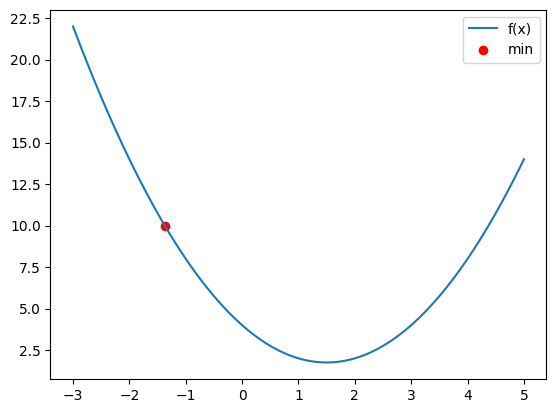

In [45]:
import matplotlib.pyplot as plt

xs = torch.linspace(-3, 5, 100)
plt.plot(xs.cpu(), f(xs).cpu(), label='f(x)')
plt.scatter(x.item(), f(x).item(), c='red', label='min')
plt.legend()

In [ ]:
x

In [ ]:
f(x)

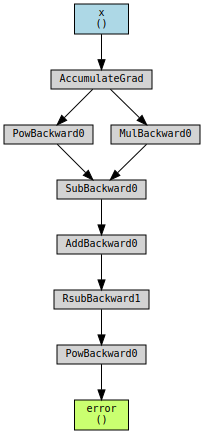

In [50]:
from torchviz import make_dot

result = f(x) 
error = (true_result - result)**2

dot = make_dot(error, params={'x': x, 'error': error})
dot

In [48]:
error

tensor(2.2737e-11, device='cuda:0', grad_fn=<PowBackward0>)

In [49]:
x

tensor(-1.3723, device='cuda:0', requires_grad=True)

# Спуск з моментом(додатково)

In [ ]:
def f(x):
  return x**2/3 + torch.sin(torch.pi*x)

In [ ]:
# підкоючаємо процесор
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# вибираємо початкове значення
x = torch.tensor(2.0, requires_grad=True)

# швидкість навчання
learning_rate = 1e-1

# ініціалізація моменту
moment = torch.tensor(0.0)
beta = 0.99

for t in range(2000):
    # обчислюємо функцію яку потрібно мінімізувати
    loss = f(x)

    # обчислюємо всі потрібні градієнти
    loss.backward()

    # вивід значення функції
    if t % 100 == 0:
      print(f'{loss.item()=}')

    # градієнтний спуск
    with torch.no_grad():
      moment = beta*moment + learning_rate*x.grad
      x -= moment

      # очищуємо пам'ять для повторного обчислення градієнтів
      x.grad = None

In [ ]:
import matplotlib.pyplot as plt

xs = torch.linspace(-3, 5, 100)
plt.plot(xs.cpu(), f(xs).cpu(), label='f(x)')
plt.scatter(x.item(), f(x).item(), c='red', label='min')
plt.legend()